In [ ]:
# Imports
import bson
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

## Les fichiers bson

In [3]:
# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())
    
    
with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())
    
with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())
    

## Visualisation d'un elements de chaque table

In [12]:
i=0
print(f"L'element {i} de la table des avis:\n",avis[i])
print(f"\nL'element {i} de la table des jeux:\n",jeux[i])
print(f"\nL'element {i} de la infos_scrapping des avis:\n",infos[i])
print(f"\nL'element {i} de la details des avis:\n",details[i])

L'element 0 de la table des avis:
 {'_id': ObjectId('63c6726ea81f3e3016af9a56'), 'author': 'Monsieur Guillaume', 'date_published': '2021-01-27 11:06:44', 'title_review': 'Voyages sur les ailes des papillons', 'note': 8, 'review_href': 'https://www.trictrac.net/avis/vraiment-bon-12514', 'title': 'Mariposas', 'url': 'https://www.trictrac.net/jeu-de-societe/mariposas/avis?limit=10000', 'treated': True, 'comment': "Lorsque le jeu est jeu, bon, réflexif, joli pour qui est sensible à ce style d'illustration... Lorsque l'on a envie d'y rejouer encore pour essayer autrement, et revivre cette histoire de papillons et de voyages... Et lorsqu'en plus, au détour des règles, on s'intéresse également au propos et à la sensibilisation, légère comme les ailes du dit-papillons et pourtant aussi bien amené, alors effectivement, il y a là un très bon jeu, ludiquement parlant (et il est possible de s'arrêter là) mais également très bon pour l'ouverture des yeux des joueuses et joueurs au monde qui nous en

In [15]:
len_details=len(details)
len_jeux=len(jeux)
len_infos=len(infos)
len_avis=len(avis)
print(f"Longeur de chaque table de données avis: {len_avis}, jeux: {len_jeux}, infos: {len_infos}, details : {len_details}")

no_cat = 0
multi_cat = 0
for d in details:
    if d["categories"]=="":
        no_cat+=1
    elif len(d["categories"].split("|"))>1:
        multi_cat+=1

        
print(f"Nombre de jeux sans categorie: {no_cat}, poucentage de jeux non catégorisé: {((no_cat/len(details))*100):.2f}%")
print(f"Nombre de jeux avec plusieurs categories par rapport au jeux categorisé {(multi_cat/(len(details)-no_cat)*100):.2f}%")


Longeur de chaque table de données avis: 246524, jeux: 20235, infos: 532, details : 20234
Nombre de jeux sans categorie: 3019, poucentage de jeux non catégorisé: 14.92%
Nombre de jeux avec plusieurs categories par rapport au jeux categorisé 29.60%


## Crée des panda dataframes

In [5]:
pdDetails = pd.DataFrame(details)
pdJeux = pd.DataFrame(jeux)
pdInfos = pd.DataFrame(infos)
pdAvis = pd.DataFrame(avis)

print("Details:\n", pdDetails.describe())
print("\nAvis:\n", pdAvis.describe())
print("\nInfos:\n", pdInfos.describe())
print("\nJeux:\n", pdJeux.describe())

Details:
                Note  Note rectifiée   Note Finkel  Nombre d'avis  \
count  20234.000000    20234.000000  20234.000000   20234.000000   
mean       4.852528        4.591857      4.897049      15.583671   
std        3.666644        3.684093      4.157989      57.265863   
min        0.000000        0.000000     -0.050000       0.000000   
25%        0.000000        0.000000      0.000000       0.000000   
50%        6.270000        6.000000      6.010000       2.000000   
75%        8.000000        7.940000      8.090000       9.000000   
max       10.000000       10.000000     41.720000    1452.000000   

       Nombre d'avis rectifiés  
count             20234.000000  
mean                 11.663438  
std                  41.129909  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   7.000000  
max                 907.000000  

Avis:
                note
count  246524.00000
mean        7.59307
std         

In [7]:
pdDetails.head()

,_id,categories,casting,gameplay,description,full_title,titre,url,Note,Note rectifiée,Note Finkel,Nombre d'avis,Nombre d'avis rectifiés
0,63c5790a08b9fb9fd8f26ec8,,Par Eric Lang et Andrea ChiarvesioIllustré par...,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),Marvel United,https://www.trictrac.net/jeu-de-societe/marvel...,7.58,8.40,8.74,19.0,10.0
1,63c5790a08b9fb9fd8f26ec9,,Par Elizabeth HargraveIllustré par Matt Paquet...,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),Mariposas,https://www.trictrac.net/jeu-de-societe/mariposas,7.39,7.29,7.68,33.0,17.0
2,63c5790b08b9fb9fd8f26eca,Enchères|Aventures dans la jungle|Collection /...,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),Quetzal,https://www.trictrac.net/jeu-de-societe/quetzal,8.18,7.22,7.42,28.0,9.0
3,63c5790b08b9fb9fd8f26ecb,,Édité par Arkhane Asylum Publishing,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),Alien - Kit de Démarrage,https://www.trictrac.net/jeu-de-societe/alien-...,9.00,0.00,0.00,4.0,0.0
4,63c5790b08b9fb9fd8f26ecc,Card-driven|Combinaison|Coopération|Deck build...,Par Maxime Rambourg et Théo RivièreIllustré pa...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),The LOOP,https://www.trictrac.net/jeu-de-societe/the-loop,8.75,8.79,9.70,72.0,24.0


In [16]:
pdJeux.tail()

,_id,title,href,treated,avis
20230,63c68a2f22080b33e5b59ce6,Quelques Arpents de Neige,https://www.trictrac.net/jeu-de-societe/quelqu...,True,False
20231,63c68a2f22080b33e5b59ce7,Toppling The Reich,https://www.trictrac.net/jeu-de-societe/toppli...,True,False
20232,63c68a2f22080b33e5b59ce8,La Vallée de la Mort,https://www.trictrac.net/jeu-de-societe/la-val...,True,False
20233,63c68a2f22080b33e5b59ce9,La Grande Pagaille,https://www.trictrac.net/jeu-de-societe/la-gra...,True,False
20234,63c68a2f22080b33e5b59cea,Imperial Sunset,https://www.trictrac.net/jeu-de-societe/imperi...,True,False


In [17]:
pdInfos.head()

,_id,url,num_page,count
0,63c17a0030ad62ea332eaea0,https://www.trictrac.net/jeu-de-societe/?order...,1,32
1,63c17a0130ad62ea332eaef0,https://www.trictrac.net/jeu-de-societe/?order...,0,32
2,63c17a0130ad62ea332eaf01,https://www.trictrac.net/jeu-de-societe/?order...,7,31
3,63c17a0130ad62ea332eaf02,https://www.trictrac.net/jeu-de-societe/?order...,6,32
4,63c17a0130ad62ea332eaf23,https://www.trictrac.net/jeu-de-societe/?order...,4,32


In [18]:
pdAvis.head(20)

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment
0,63c6726ea81f3e3016af9a56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,63c6726ea81f3e3016af9a57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7.0,https://www.trictrac.net/avis/le-festival-de-m...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Comment continuer après un mega hit ? Simpleme...
2,63c6726ea81f3e3016af9a58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7.0,https://www.trictrac.net/avis/vivez-la-migrati...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,63c6726ea81f3e3016af9a59,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
4,63c6726ea81f3e3016af9a5a,prunelles,2021-05-24 12:43:18,Envolez-moi,9.0,https://www.trictrac.net/avis/envolez-moi,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Très joli bijou que ce jeu-là ! Le matériel, l..."
5,63c6726ea81f3e3016af9a5b,BSI40,2022-09-23 17:16:27,Manque un peu de souffle,7.0,https://www.trictrac.net/avis/manque-un-peu-de...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Mariposas est plutôt beau avec un grand platea...
6,63c6726ea81f3e3016af9a5c,kakawette,2020-09-10 23:16:35,"Papillon de lumière, sous les projecteurs",7.0,https://www.trictrac.net/avis/bon-13703,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Simple d'accès, mais tout de même un peu tacti..."
7,63c6726ea81f3e3016af9a5d,PawnPawn,2021-05-10 08:29:40,Pas mauvais,6.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
8,63c6726ea81f3e3016af9a5e,M.PinK,2021-08-29 10:37:54,Bon,7.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
9,63c6726ea81f3e3016af9a5f,micmac85,2022-01-04 14:07:17,Bon,8.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN


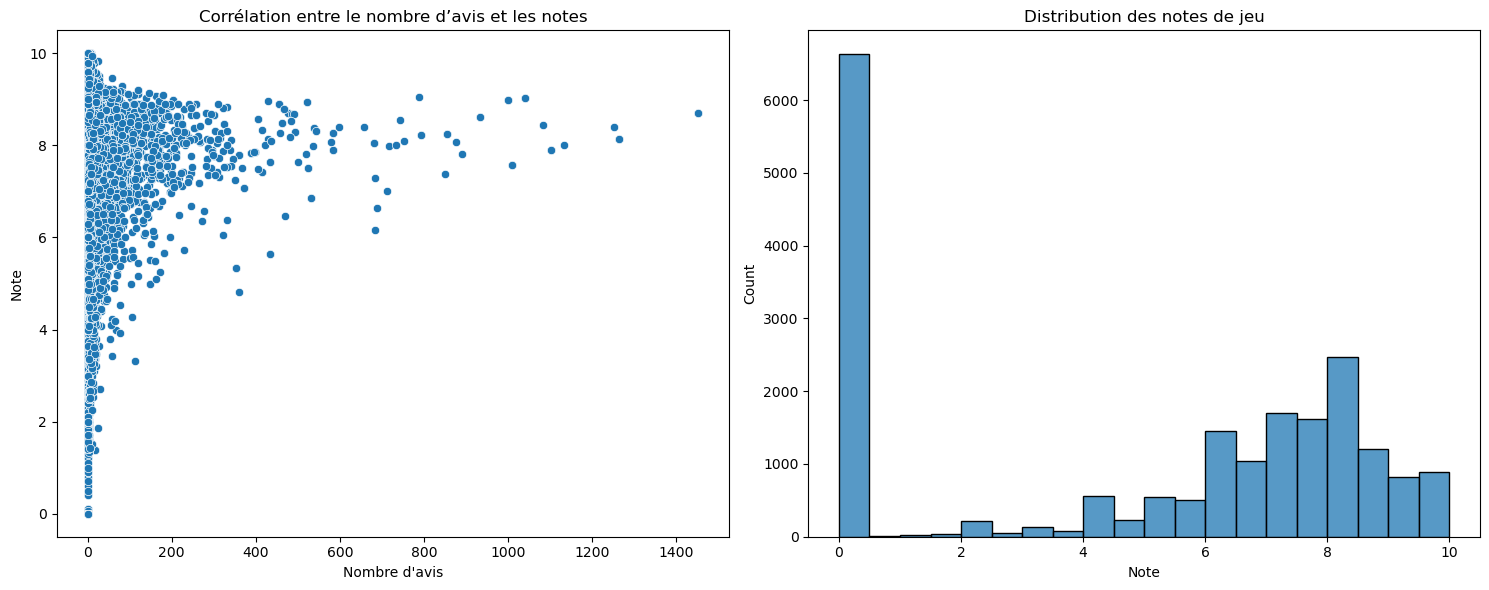

Coefficient de corrélation entre le nombre d’avis et les notes: 0.214


In [17]:

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pdDetails, x='Nombre d\'avis', y='Note')
plt.title('Corrélation entre le nombre d’avis et les notes')
plt.xlabel("Nombre d'avis")
plt.ylabel('Note')

plt.subplot(1, 2, 2)
sns.histplot(data=pdDetails, x='Note', bins=20)
plt.title('Distribution des notes de jeu')
plt.xlabel('Note')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

correlation = pdDetails['Nombre d\'avis'].corr(pdDetails['Note'])
print(f"Coefficient de corrélation entre le nombre d’avis et les notes: {correlation:.3f}")
# Il y a une tendence ou des jeux avec plus de commentaires pour avoir des notes plus élevées

In [18]:
# Method 1: Using pdDetails to check games with 0 reviews
games_no_reviews_1 = len(pdDetails[pdDetails["Nombre d'avis"] == 0.0])

# Method 2: Using pdJeux to check games with no reviews
games_no_reviews_2 = len(pdJeux[pdJeux["avis"] == False])

print(f"Nombre de jeux avec 0 avis (utilisant pdDetails): {games_no_reviews_1}")
print(f"Nombre de jeux sans avis (en utilisant pdJeux): {games_no_reviews_2}")

# Calculate percentage
total_games = len(pdDetails)
percentage_no_reviews = (games_no_reviews_1 / total_games) * 100

print(f"\nPourcentage de jeux sans avis : {percentage_no_reviews:.2f}%")



Nombre de jeux avec 0 avis (utilisant pdDetails): 6616
Nombre de jeux sans avis (en utilisant pdJeux): 18

Pourcentage de jeux sans avis : 32.70%


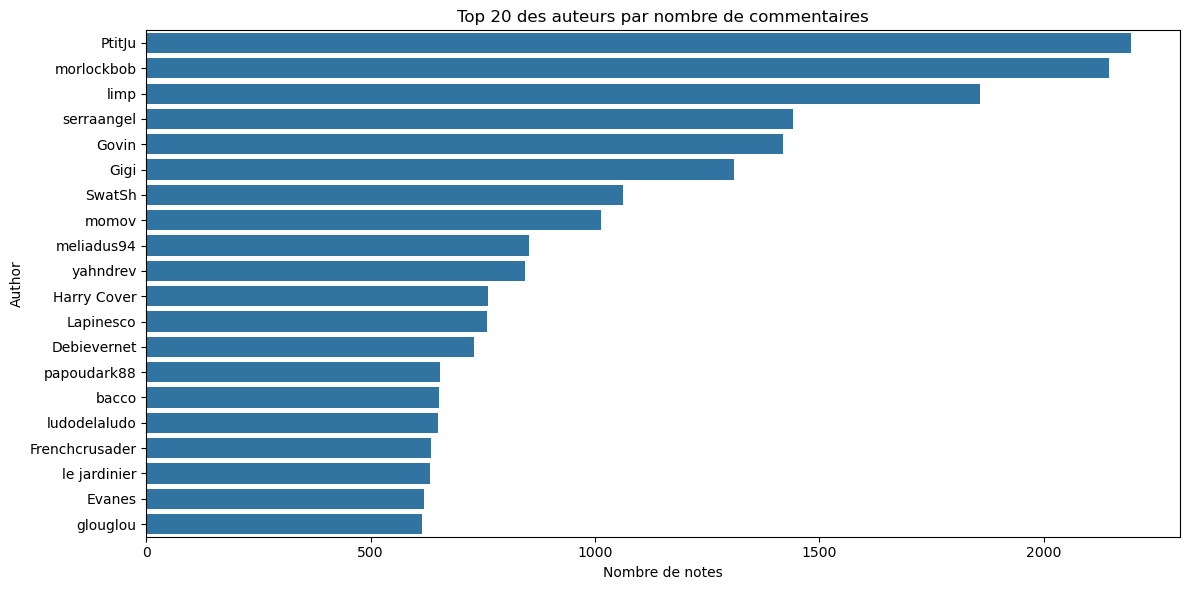

Nombre total d’auteurs uniques : 13623
Moyenne des avis par auteur : 18.10
Median des avis par auteur: 4.00

Top 5 most active reviewers:
author
PtitJu        2194
morlockbob    2146
limp          1858
serraangel    1442
Govin         1418
Name: count, dtype: int64


In [19]:
author_counts = pdAvis['author'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.head(20).values, y=author_counts.head(20).index)
plt.title('Top 20 des auteurs par nombre de commentaires')
plt.xlabel('Nombre de notes')
plt.ylabel('Author')

plt.tight_layout()
plt.show()

print(f"Nombre total d’auteurs uniques : {len(author_counts)}")
print(f"Moyenne des avis par auteur : {author_counts.mean():.2f}")
print(f"Median des avis par auteur: {author_counts.median():.2f}")
print("\nTop 5 most active reviewers:")
print(author_counts.head())

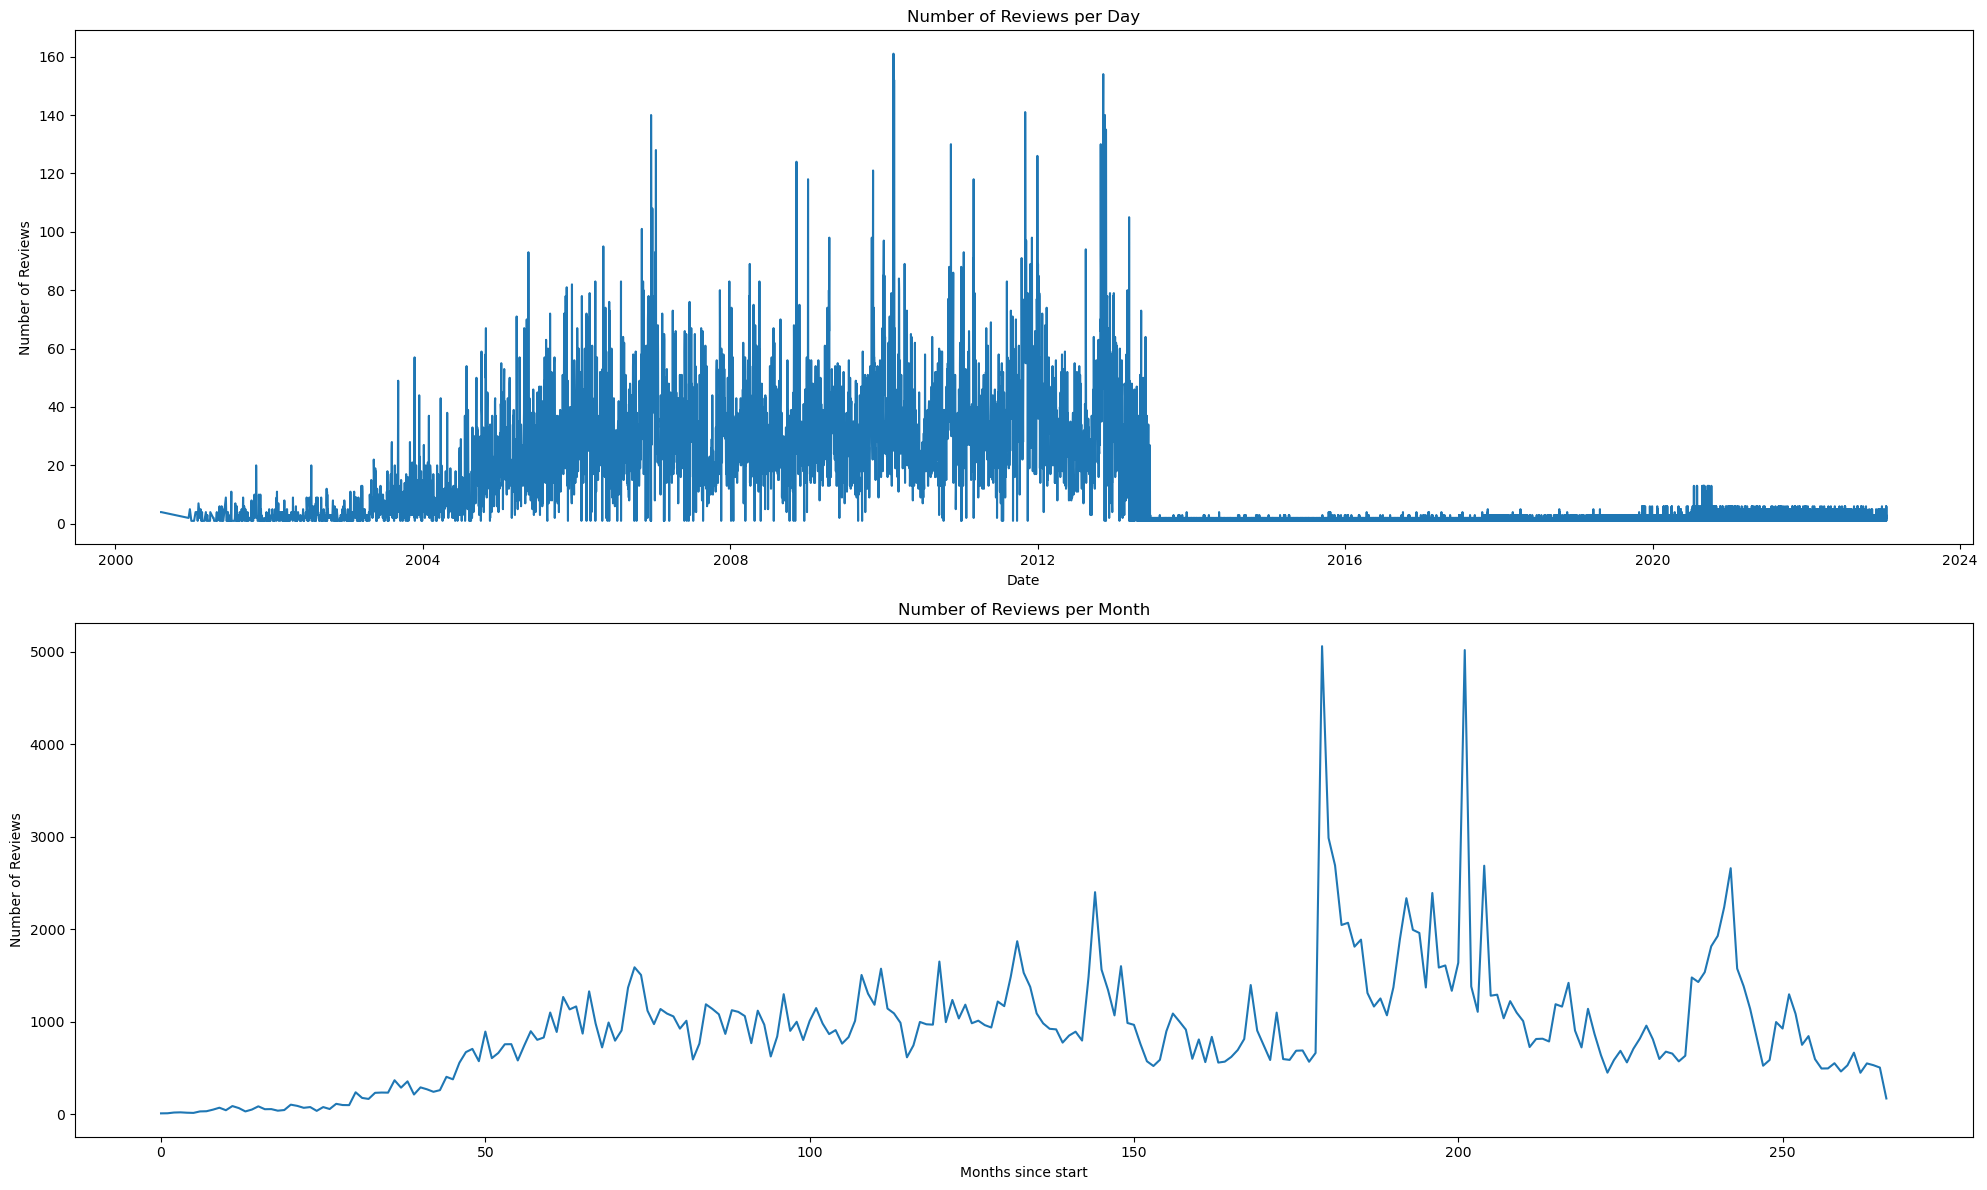

Total number of reviews: 246524
Average reviews per day: 3.16
Average reviews per month: 923.31
Most active day: 2010-02-14 with 161 reviews


In [20]:
# Convert date_published to datetime 
pdAvis['date_published'] = pd.to_datetime(pdAvis['date_published'])


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

# Daily review counts
daily_reviews = pdAvis['date_published'].value_counts().sort_index()
ax1.plot(daily_reviews.index, daily_reviews.values)
ax1.set_title('Number of Reviews per Day')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Reviews')

# Monthly review counts
monthly_reviews = pdAvis.groupby(pdAvis['date_published'].dt.to_period('M')).size()
ax2.plot(range(len(monthly_reviews)), monthly_reviews.values)
ax2.set_title('Number of Reviews per Month')
ax2.set_xlabel('Months since start')
ax2.set_ylabel('Number of Reviews')


plt.tight_layout()
plt.show()

# Print statistics
print(f"Total number of reviews: {len(pdAvis)}")
print(f"Average reviews per day: {daily_reviews.mean():.2f}")
print(f"Average reviews per month: {monthly_reviews.mean():.2f}")
print(f"Most active day: {daily_reviews.index[daily_reviews.argmax()].date()} with {daily_reviews.max()} reviews")

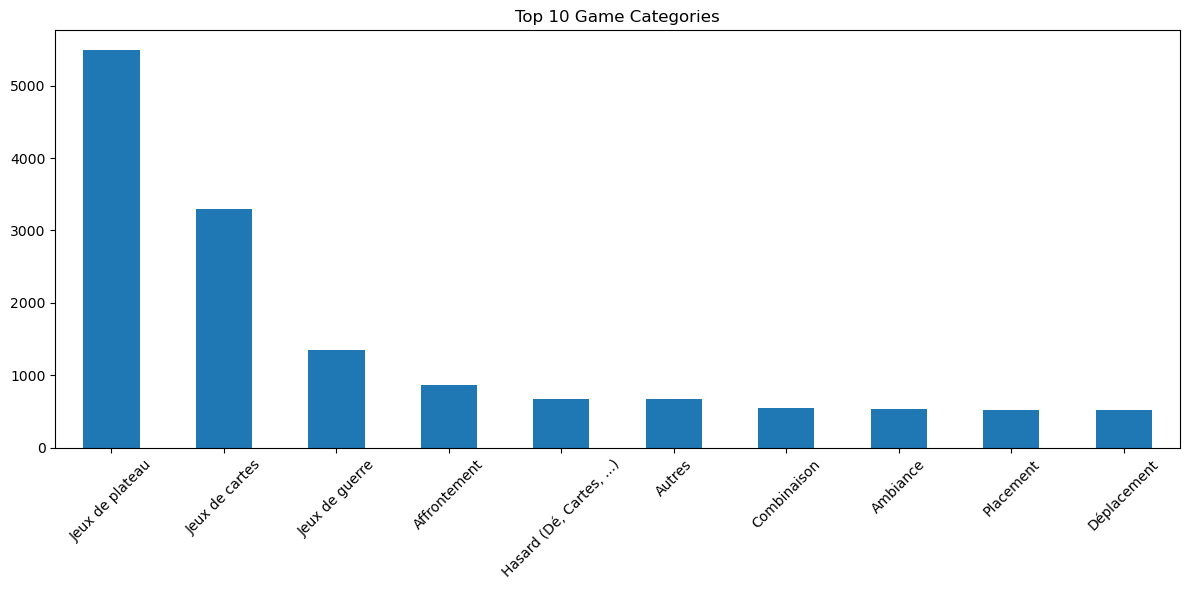

In [21]:
# Analyze game categories
def extract_categories(cat_str):
    if pd.isna(cat_str) or cat_str == "":
        return []
    return cat_str.split('|')

# Create category analysis
pdDetails['category_list'] = pdDetails['categories'].apply(extract_categories)
categories = [cat for cats in pdDetails['category_list'] for cat in cats]
cat_counts = pd.Series(categories).value_counts()

plt.figure(figsize=(12, 6))
cat_counts.head(10).plot(kind='bar')
plt.title('Top 10 Game Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
def extract_creators(casting):
    if pd.isna(casting):
        return []
    creators = re.findall(r'Par (.*?)(?:Illustré|Édité|$)', casting)
    return [c.strip() for c in creators]

pdDetails['creators'] = pdDetails['casting'].apply(extract_creators)
creators = [c for creators in pdDetails['creators'] for c in creators]
creator_counts = pd.Series(creators).value_counts()

print("Top 10 Game Creators:")
print(creator_counts.head(10))

Top 10 Game Creators:
Reiner Knizia        196
Steve Jackson         82
Michael Schacht       77
Klaus Teuber          68
Antoine Bauza         66
Martin Wallace        58
Friedemann Friese     56
Richard Borg          55
Uwe Rosenberg         52
Heinz Meister         47
Name: count, dtype: int64


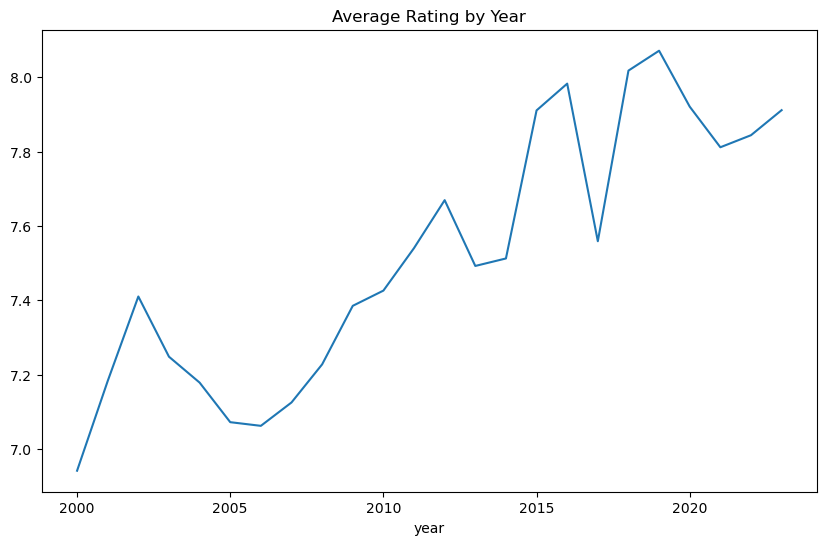

In [23]:
# Analyze rating trends over years
pdAvis['year'] = pdAvis['date_published'].dt.year
yearly_ratings = pdAvis.groupby('year')['note'].agg(['mean', 'count', 'std'])

plt.figure(figsize=(10, 6))
yearly_ratings['mean'].plot()
plt.title('Average Rating by Year')
plt.show()

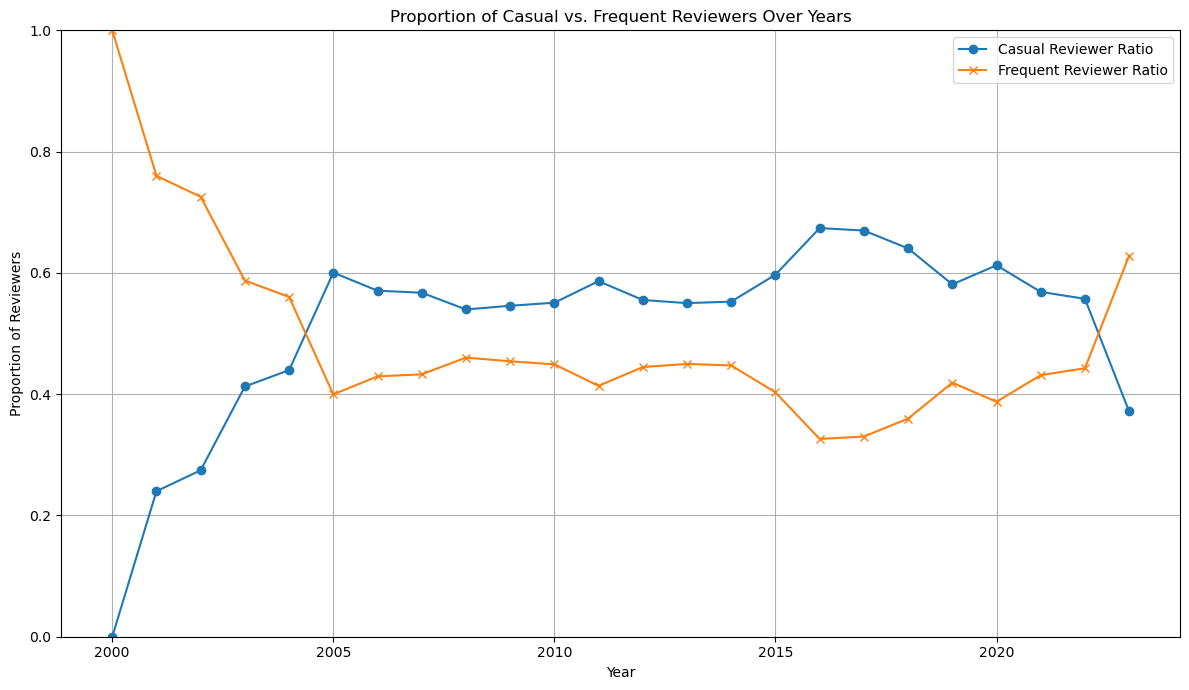

In [29]:


if 'year' not in pdAvis.columns:
    pdAvis['year'] = pdAvis['date_published'].dt.year
if 'user_type' not in pdAvis.columns:
    user_rating_counts = pdAvis['author'].value_counts()
    casual_users = user_rating_counts[user_rating_counts < 18].index
    frequent_users = user_rating_counts[user_rating_counts >= 18].index
    pdAvis['user_type'] = 'Casual Reviewer'
    pdAvis.loc[pdAvis['author'].isin(frequent_users), 'user_type'] = 'Frequent Reviewer'

# Count unique reviewers per year and type
reviewer_counts_by_year_type = pdAvis.groupby(['year', 'user_type'])['author'].nunique().unstack(fill_value=0)

# Calculate the total number of unique reviewers per year
reviewer_counts_by_year_type['total_reviewers'] = reviewer_counts_by_year_type['Casual Reviewer'] + reviewer_counts_by_year_type['Frequent Reviewer']

# Calculate proportions
reviewer_counts_by_year_type['casual_ratio'] = reviewer_counts_by_year_type['Casual Reviewer'] / reviewer_counts_by_year_type['total_reviewers']
reviewer_counts_by_year_type['frequent_ratio'] = reviewer_counts_by_year_type['Frequent Reviewer'] / reviewer_counts_by_year_type['total_reviewers']

# Plotting the ratios
plt.figure(figsize=(12, 7))
plt.plot(reviewer_counts_by_year_type.index, reviewer_counts_by_year_type['casual_ratio'], label='Casual Reviewer Ratio', marker='o')
plt.plot(reviewer_counts_by_year_type.index, reviewer_counts_by_year_type['frequent_ratio'], label='Frequent Reviewer Ratio', marker='x')

plt.title('Proportion of Casual vs. Frequent Reviewers Over Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Reviewers')
plt.legend()
plt.grid(True)
plt.ylim(0, 1) # Ratios are between 0 and 1
plt.tight_layout()
plt.show()



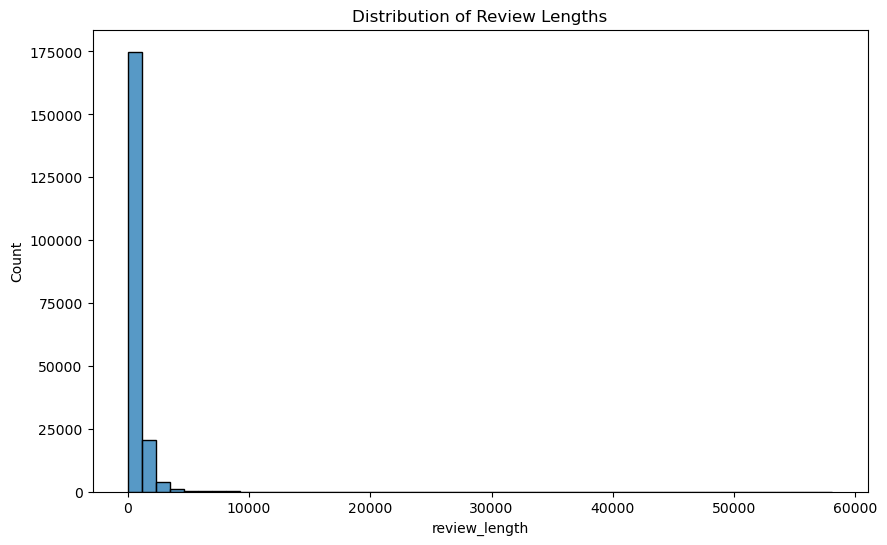

Average review length: 619 characters


In [31]:
pdAvis['review_length'] = pdAvis['comment'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

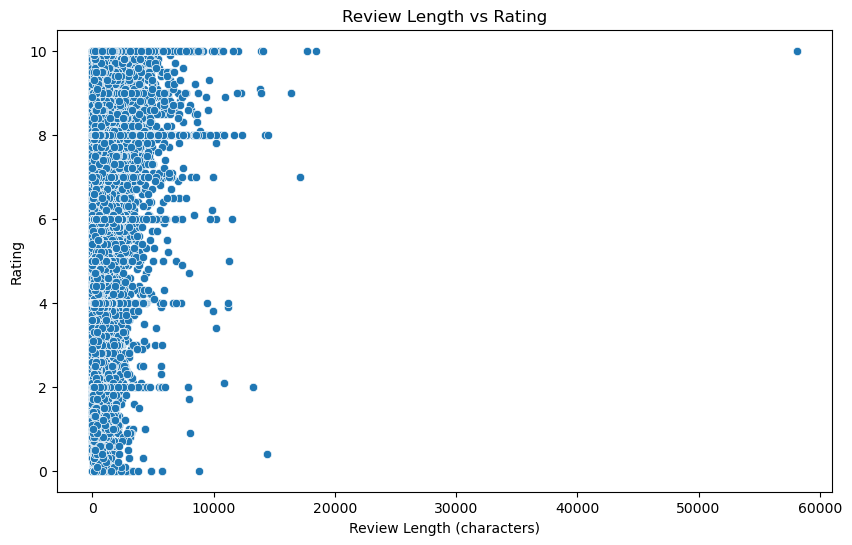

In [32]:
# Analyze if review length correlates with rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pdAvis, x='review_length', y='note')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()

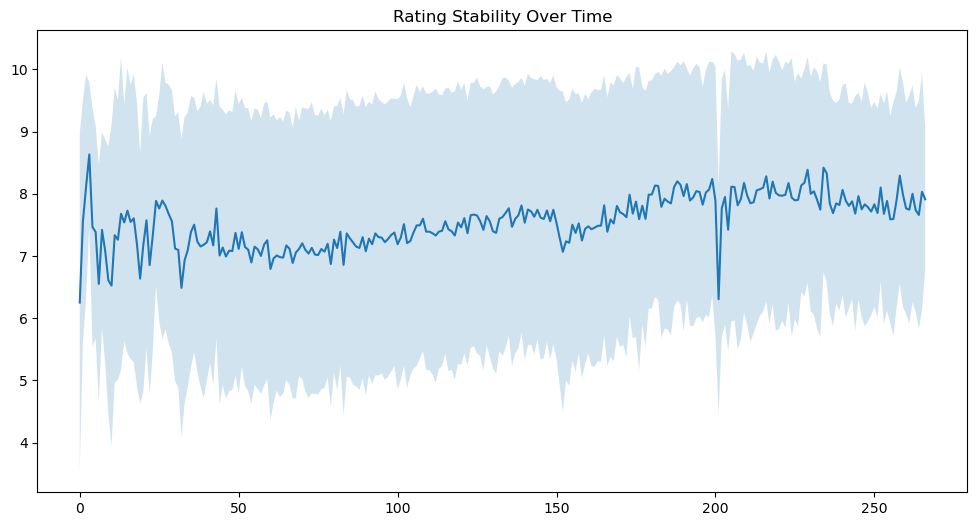

In [33]:
# Check if ratings are stable over time
pdAvis['month_year'] = pdAvis['date_published'].dt.to_period('M')
monthly_stats = pdAvis.groupby('month_year')['note'].agg(['mean', 'std'])

plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_stats)), monthly_stats['mean'])
plt.fill_between(range(len(monthly_stats)), 
                 monthly_stats['mean'] - monthly_stats['std'],
                 monthly_stats['mean'] + monthly_stats['std'],
                 alpha=0.2)
plt.title('Rating Stability Over Time')
plt.show()

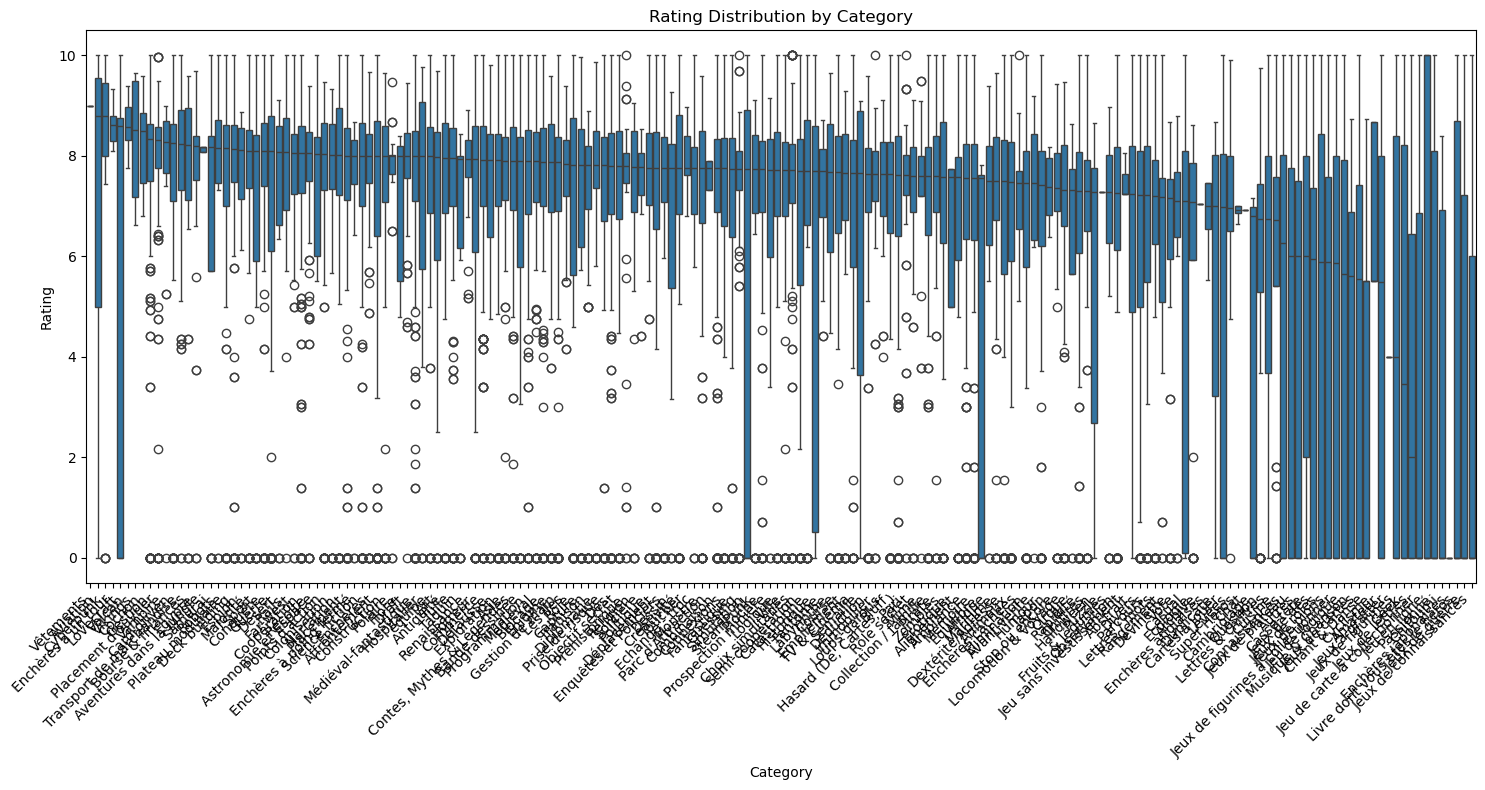


Category Statistics:
              count  mean  median   std
category                               
Abstrait        180  5.83    7.24  3.38
Affrontement    863  6.68    8.00  3.22
Afrique          30  6.93    7.50  2.17
Alignement       68  6.07    7.58  3.40
Amateur         218  4.24    5.50  4.01
...             ...   ...     ...   ...
Vote             23  6.32    7.10  2.60
Vêtements         2  9.00    9.00  0.00
Zombies         110  6.87    7.58  2.68
Équilibre        13  4.94    7.55  3.53
équipe          123  7.29    7.99  2.14

[184 rows x 4 columns]


In [34]:
# Expand categories into separate rows
category_ratings = []
for idx, row in pdDetails.iterrows():
    if isinstance(row['category_list'], list):
        for category in row['category_list']:
            category_ratings.append({
                'category': category,
                'rating': row['Note']
            })

# Create DataFrame and calculate category stats
cat_df = pd.DataFrame(category_ratings)
cat_stats = cat_df.groupby('category')['rating'].median().sort_values(ascending=False)

# Create box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cat_df, x='category', y='rating', order=cat_stats.index)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()

# Display plot
plt.show()

# Print category statistics
print("\nCategory Statistics:")
print(cat_df.groupby('category')['rating'].agg(['count', 'mean', 'median', 'std']).round(2))

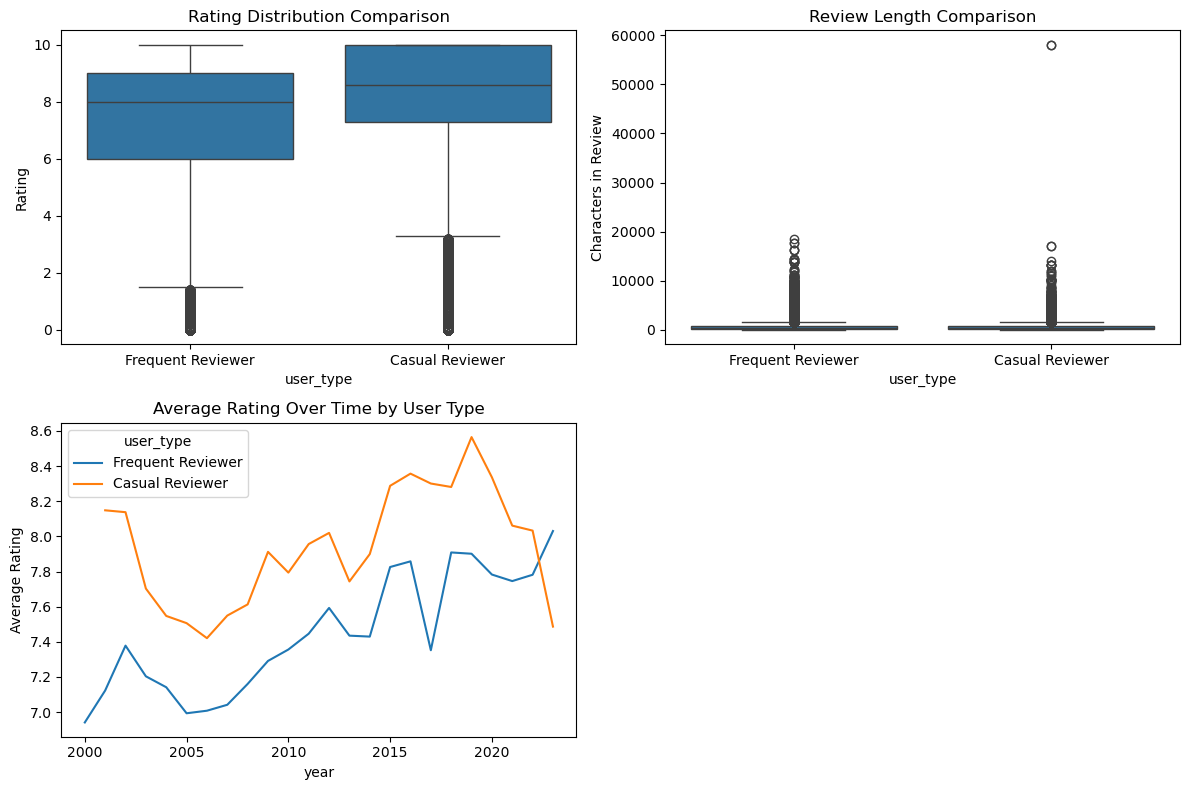

Rating Statistics Comparison:
       Casual Reviewers  Frequent Reviewers
count          47840.00           198684.00
mean               8.06                7.48
std                2.20                2.09
min                0.00                0.00
25%                7.30                6.00
50%                8.60                8.00
75%               10.00                9.00
max               10.00               10.00

Casual reviewers (<18 ratings): 11208 (82.3% of users)
Frequent reviewers (≥18 ratings): 2415 (17.7% of users)

Casual reviewers contribute 47840 ratings (19.4% of all ratings)
Frequent reviewers contribute 198684 ratings (80.6% of all ratings)


In [35]:
# Get count of ratings per user
user_rating_counts = pdAvis['author'].value_counts()

# Define casual vs frequent reviewers (below vs above average)
casual_users = user_rating_counts[user_rating_counts < 18].index
frequent_users = user_rating_counts[user_rating_counts >= 18].index

# Add a new column to identify user type
pdAvis['user_type'] = 'Casual Reviewer' 
pdAvis.loc[pdAvis['author'].isin(frequent_users), 'user_type'] = 'Frequent Reviewer'


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.boxplot(data=pdAvis, x='user_type', y='note')
plt.title('Rating Distribution Comparison')
plt.ylabel('Rating')

plt.subplot(2, 2, 2)
sns.boxplot(data=pdAvis, x='user_type', y='review_length')
plt.title('Review Length Comparison')
plt.ylabel('Characters in Review')

plt.subplot(2, 2, 3)
time_data = pdAvis.groupby(['year', 'user_type'])['note'].mean().reset_index()
sns.lineplot(data=time_data, x='year', y='note', hue='user_type')
plt.title('Average Rating Over Time by User Type')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

casual_stats = pdAvis[pdAvis['user_type'] == 'Casual Reviewer']['note'].describe()
frequent_stats = pdAvis[pdAvis['user_type'] == 'Frequent Reviewer']['note'].describe()

comparison = pd.concat([casual_stats, frequent_stats], axis=1)
comparison.columns = ['Casual Reviewers', 'Frequent Reviewers']
print("Rating Statistics Comparison:")
print(comparison.round(2))

casual_count = len(casual_users)
frequent_count = len(frequent_users) 
total_users = len(user_rating_counts)

print(f"\nCasual reviewers (<18 ratings): {casual_count} ({casual_count/total_users:.1%} of users)")
print(f"Frequent reviewers (≥18 ratings): {frequent_count} ({frequent_count/total_users:.1%} of users)")

# Calculate percentage of total ratings from each group
casual_ratings_count = pdAvis[pdAvis['user_type'] == 'Casual Reviewer'].shape[0]
frequent_ratings_count = pdAvis[pdAvis['user_type'] == 'Frequent Reviewer'].shape[0]
total_ratings = pdAvis.shape[0]

print(f"\nCasual reviewers contribute {casual_ratings_count} ratings ({casual_ratings_count/total_ratings:.1%} of all ratings)")
print(f"Frequent reviewers contribute {frequent_ratings_count} ratings ({frequent_ratings_count/total_ratings:.1%} of all ratings)")

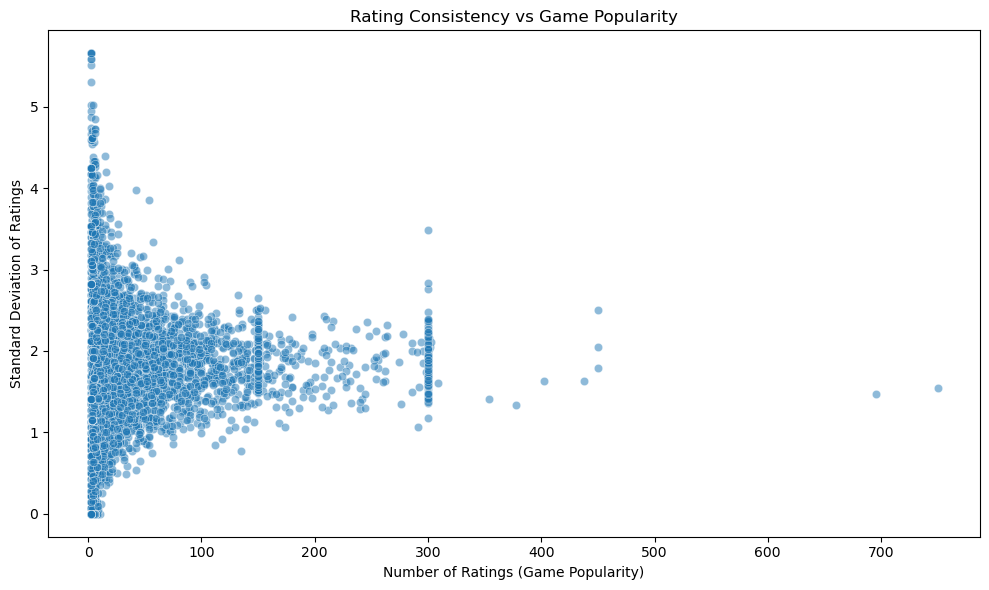

In [36]:

# Group games by number of ratings and calculate rating statistics
game_rating_counts = pdAvis.groupby('title')['note'].count().reset_index()
game_rating_counts.columns = ['title', 'rating_count']

game_stats = pdAvis.groupby('title')['note'].agg(['mean', 'std']).reset_index()
game_analysis = pd.merge(game_rating_counts, game_stats, on='title')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=game_analysis, x='rating_count', y='std', alpha=0.5)
plt.title('Rating Consistency vs Game Popularity')
plt.xlabel('Number of Ratings (Game Popularity)')
plt.ylabel('Standard Deviation of Ratings')
plt.tight_layout()
plt.show()



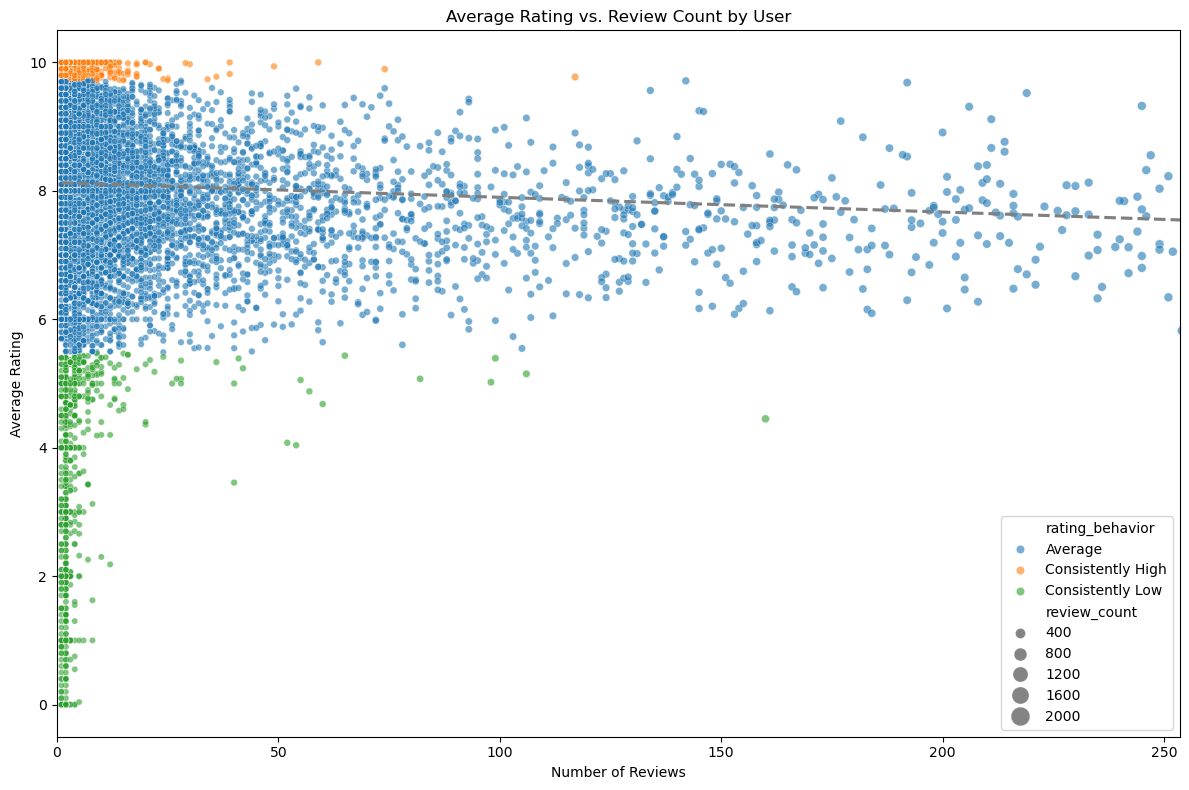

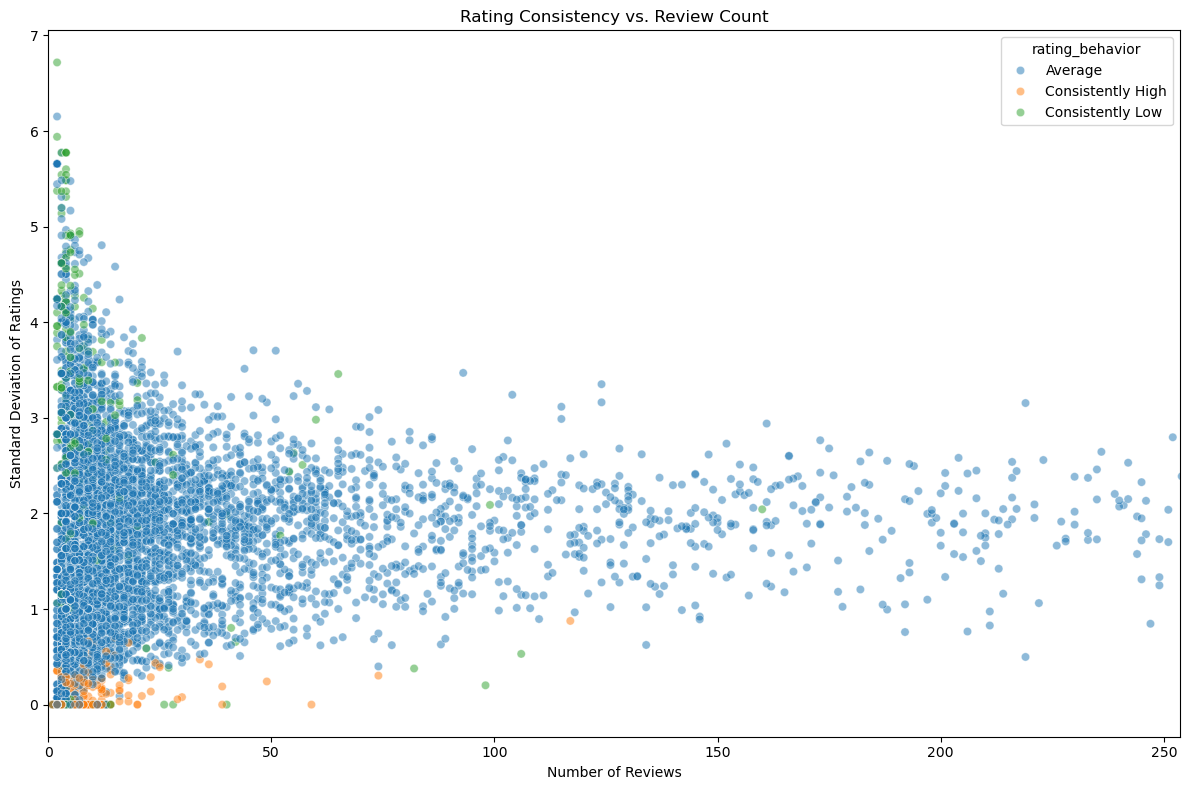

Total users: 13623

Rating behavior distribution:
  Average: 9814 users (72.0%)
  Consistently High: 2840 users (20.8%)
  Consistently Low: 969 users (7.1%)

Top 10 users with consistently highest ratings (min 5 reviews):
                  author  review_count  avg_rating  rating_std
5212                Nido             5        10.0         0.0
273       Alexandre51100             5        10.0         0.0
2839   GuillaumeLeJoueur             5        10.0         0.0
1853          Dr Globule             8        10.0         0.0
618               BAZALF             5        10.0         0.0
2854            GussMuss             7        10.0         0.0
11796         papillon_i             5        10.0         0.0
11820            pat14qc             8        10.0         0.0
5289             Notilus             6        10.0         0.0
12967        thierry2015             7        10.0         0.0

Top 10 users with consistently lowest ratings (min 5 reviews):
              author 

In [40]:

# Calculate user statistics
user_stats = pdAvis.groupby('author').agg({
    'note': ['count', 'mean', 'std'],
}).reset_index()

# Flatten MultiIndex columns
user_stats.columns = ['author', 'review_count', 'avg_rating', 'rating_std']

# Handle users with only 1 review (NaN std)
user_stats['rating_std'] = user_stats['rating_std'].fillna(0)

# Define outlier thresholds for high and low raters (e.g., 1.5 std from global mean)
global_mean = pdAvis['note'].mean()
global_std = pdAvis['note'].std()

high_threshold = global_mean + 1 * global_std  # Users consistently rating higher
low_threshold = global_mean - 1 * global_std   # Users consistently rating lower

# Flag outlier users
user_stats['rating_behavior'] = 'Average'
user_stats.loc[user_stats['avg_rating'] >= high_threshold, 'rating_behavior'] = 'Consistently High'
user_stats.loc[user_stats['avg_rating'] <= low_threshold, 'rating_behavior'] = 'Consistently Low'

# Count users in each category
behavior_counts = user_stats['rating_behavior'].value_counts()

# Create scatter plot of avg rating vs review count with behavioral coloring
plt.figure(figsize=(12, 8))

# Add regression line
sns.regplot(data=user_stats, x='review_count', y='avg_rating', 
            scatter=False, ci=None, color='gray', line_kws={'linestyle':'--'})

# Plot points with color by rating behavior
sns.scatterplot(
    data=user_stats,
    x='review_count',
    y='avg_rating',
    hue='rating_behavior',
    size='review_count',  # Size points by review count
    sizes=(20, 200),
    alpha=0.6
)

plt.title('Average Rating vs. Review Count by User')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.xlim(0, user_stats['review_count'].quantile(0.99))  # Limit x-axis for better visibility
plt.tight_layout()
plt.show()

# Plot rating consistency (std dev) vs review count
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=user_stats,
    x='review_count',
    y='rating_std',
    hue='rating_behavior',
    alpha=0.5
)
plt.title('Rating Consistency vs. Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Standard Deviation of Ratings')
plt.xlim(0, user_stats['review_count'].quantile(0.99))
plt.tight_layout()
plt.show()

# Print statistics about user rating behaviors
print(f"Total users: {len(user_stats)}")
print("\nRating behavior distribution:")
for behavior, count in behavior_counts.items():
    print(f"  {behavior}: {count} users ({100 * count / len(user_stats):.1f}%)")

# Show top 10 users with highest and lowest average ratings (with at least 5 reviews)
min_reviews = 5
print(f"\nTop 10 users with consistently highest ratings (min {min_reviews} reviews):")
print(user_stats[user_stats['review_count'] >= min_reviews].sort_values('avg_rating', ascending=False).head(10)[['author', 'review_count', 'avg_rating', 'rating_std']])

print(f"\nTop 10 users with consistently lowest ratings (min {min_reviews} reviews):")
print(user_stats[user_stats['review_count'] >= min_reviews].sort_values('avg_rating').head(10)[['author', 'review_count', 'avg_rating', 'rating_std']])

# Optional: Add analysis of users' game category preferences
if 'category_list' in pdDetails.columns:
    # Create a mapping of titles to categories
    game_categories = {}
    for _, row in pdDetails.iterrows():
        if isinstance(row['category_list'], list) and len(row['category_list']) > 0:
            game_categories[row['titre']] = row['category_list']
    
    # For each user's reviews, get the categories of games they reviewed
    user_categories = {}
    for author in user_stats['author']:
        user_games = pdAvis[pdAvis['author'] == author]['title'].tolist()
        user_cats = []
        for game in user_games:
            if game in game_categories:
                user_cats.extend(game_categories[game])
        
        if user_cats:
            user_categories[author] = Counter(user_cats)
    
    # Find top 3 categories for a sample of high, average, and low raters
    sample_high = user_stats[user_stats['rating_behavior'] == 'Consistently High'].head(5)['author'].tolist()
    sample_low = user_stats[user_stats['rating_behavior'] == 'Consistently Low'].head(5)['author'].tolist()
    sample_avg = user_stats[user_stats['rating_behavior'] == 'Average'].head(5)['author'].tolist()
    
    print("\nCategory preferences by rating behavior (sample):")
    
    print("\nConsistently high raters prefer:")
    for author in sample_high:
        if author in user_categories:
            top_cats = sorted(user_categories[author].items(), key=lambda x: x[1], reverse=True)[:3]
            print(f"  {author}: {[cat for cat, _ in top_cats]}")
    
    print("\nConsistently low raters prefer:")
    for author in sample_low:
        if author in user_categories:
            top_cats = sorted(user_categories[author].items(), key=lambda x: x[1], reverse=True)[:3]
            print(f"  {author}: {[cat for cat, _ in top_cats]}")